In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
import xgboost as xgb
import joblib
import os
import numpy as np

In [2]:
# 1. 데이터 로드
INPUT_PATH = "../data/cleaned_apt_trades_mapo_2024.csv"
df = pd.read_csv(INPUT_PATH)

In [3]:
# 2. 특성과 타깃 정의
features = ["area_m2", "floor", "year_built", "lat", "lng"]
target = "price"

X = df[features]
y = df[target]

In [4]:
# 3. 학습/검증 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [5]:
# 4. 모델 정의 및 학습
model = xgb.XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
)

model.fit(
    X_train,
    y_train,
    eval_set=[(X_test, y_test)],
    verbose=True,
)

[0]	validation_0-rmse:43349.37103
[1]	validation_0-rmse:40181.40839
[2]	validation_0-rmse:37129.52208
[3]	validation_0-rmse:34494.77168
[4]	validation_0-rmse:32055.72327
[5]	validation_0-rmse:29876.03706
[6]	validation_0-rmse:27949.96291
[7]	validation_0-rmse:26258.90120
[8]	validation_0-rmse:24805.80120
[9]	validation_0-rmse:23549.89569
[10]	validation_0-rmse:22427.84067
[11]	validation_0-rmse:21408.19383
[12]	validation_0-rmse:20464.13215
[13]	validation_0-rmse:19683.84994
[14]	validation_0-rmse:19032.08480
[15]	validation_0-rmse:18342.88543
[16]	validation_0-rmse:17776.51078
[17]	validation_0-rmse:17296.08854
[18]	validation_0-rmse:16851.91341
[19]	validation_0-rmse:16354.11589
[20]	validation_0-rmse:15917.32363
[21]	validation_0-rmse:15577.37036
[22]	validation_0-rmse:15202.94974
[23]	validation_0-rmse:14983.94111
[24]	validation_0-rmse:14677.50402
[25]	validation_0-rmse:14459.73364
[26]	validation_0-rmse:14187.54231
[27]	validation_0-rmse:13977.05767
[28]	validation_0-rmse:13717.7

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [6]:
# 5. 예측 및 평가
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"MAE (평균 오차): {mae:.2f} 만원")
print(f"RMSE (제곱 평균 오차): {rmse:.2f} 만원")

MAE (평균 오차): 6527.49 만원
RMSE (제곱 평균 오차): 9363.57 만원


In [7]:
# 6. 예측 결과 일부 출력
y_test_sample = y_test.reset_index(drop=True)
compare_df = pd.DataFrame(
    {
        "실제값": y_test_sample,
        "예측값": np.round(y_pred, 0),
    }
)
print("\n 예측 결과 샘플:")
print(compare_df.head(10))


 예측 결과 샘플:
      실제값       예측값
0  162000  171679.0
1  174000  173967.0
2  174500  172013.0
3   52500   47139.0
4  150000  150198.0
5  240000  227590.0
6   92300   78490.0
7   67500   66393.0
8  171000  171982.0
9   79800   80015.0


In [8]:
# 7. 모델 저장
os.makedirs("../models", exist_ok=True)
joblib.dump(model, "../models/xgboost_price_model.pkl")
print("모델 저장 완료: xgboost_price_model.pkl")

모델 저장 완료: xgboost_price_model.pkl


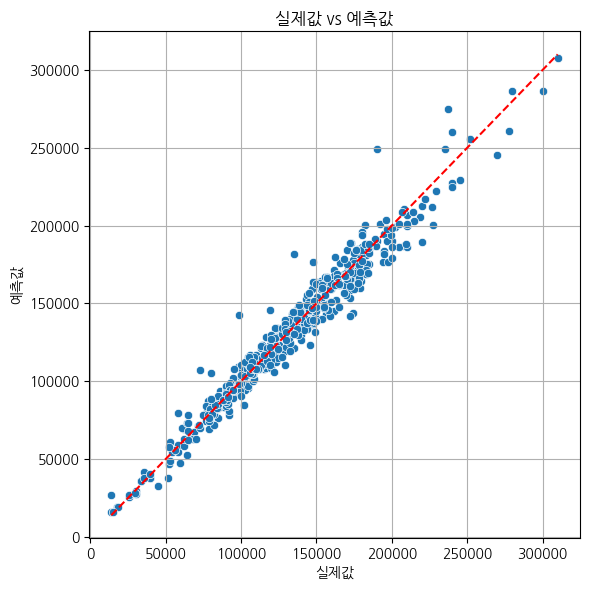

In [9]:
# 8. 모델 시각화
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams["axes.unicode_minus"] = False

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "--r")
plt.xlabel("실제값")
plt.ylabel("예측값")
plt.title("실제값 vs 예측값")
plt.grid(True)
plt.tight_layout()
plt.show()